## Machine learning Programming Exercise
Author: Lucie Korená
Email: luciekorena@seznam.cz

Predict the status of unlabeled deletions (true/false) is based on the genotyping quality of deletion carriers (altgq)

## 1. Load and work with the input data

In [4]:
import pandas as pd
diffexpr = pd.read_csv("deletion.tsv.gz",compression = 'gzip', header = 0, sep = '\t')
diffexpr

,chr_start_end,id,size,vac,vaf,pass,missingrate,precise,ci,ce,refgq,altgq,rdratio,refratio,altratio,maxaltratio,status
0,chr1_597938_598745,DEL00000012,808,1,0.000200,0,0.001997,0,287,0.00000,26,11,0.945455,0.0,0.285714,0.285714,NaN
1,chr1_713026_713083,DEL00000018,58,7,0.001399,1,0.000799,1,6,1.90770,21,28,0.648186,0.0,0.500000,0.888889,NaN
2,chr1_778727_778781,DEL00000020,55,1,0.000200,1,0.000000,1,2,1.92127,96,10000,0.668154,0.0,0.547619,0.547619,NaN
3,chr1_938037_938670,DEL00000080,634,10,0.001997,1,0.000000,1,5,1.92573,102,10000,0.434565,0.0,0.545455,1.000000,NaN
4,chr1_1053192_1053244,DEL00000114,53,307,0.061302,1,0.000000,1,24,1.87118,78,10000,0.717275,0.0,0.590909,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27100,chrX_155250109_155250983,DEL00202501,875,10,0.001997,1,0.000000,0,136,0.00000,54,21,0.964944,0.0,0.090909,1.000000,NaN
27101,chrX_155265807_155266142,DEL00202508,336,2,0.000399,1,0.000000,1,5,1.88236,48,10000,0.522206,0.0,0.636364,0.636364,NaN
27102,chrX_155666910_155667807,DEL00202560,898,1,0.000200,1,0.000000,1,5,1.90604,54,135,0.499575,0.0,0.291667,0.291667,NaN
27103,chrX_155819916_155819986,DEL00202579,71,18,0.003594,1,0.000000,1,8,1.98825,81,10000,0.627721,0.0,0.536585,0.884615,NaN


In [5]:
diffexpr.set_index("id",drop=True,inplace=True)
diffexpr.drop("chr_start_end",axis=1,inplace=True)
diffexpr

,size,vac,vaf,pass,missingrate,precise,ci,ce,refgq,altgq,rdratio,refratio,altratio,maxaltratio,status
id,,,,,,,,,,,,,,,
DEL00000012,808,1,0.000200,0,0.001997,0,287,0.00000,26,11,0.945455,0.0,0.285714,0.285714,NaN
DEL00000018,58,7,0.001399,1,0.000799,1,6,1.90770,21,28,0.648186,0.0,0.500000,0.888889,NaN
DEL00000020,55,1,0.000200,1,0.000000,1,2,1.92127,96,10000,0.668154,0.0,0.547619,0.547619,NaN
DEL00000080,634,10,0.001997,1,0.000000,1,5,1.92573,102,10000,0.434565,0.0,0.545455,1.000000,NaN
DEL00000114,53,307,0.061302,1,0.000000,1,24,1.87118,78,10000,0.717275,0.0,0.590909,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEL00202501,875,10,0.001997,1,0.000000,0,136,0.00000,54,21,0.964944,0.0,0.090909,1.000000,NaN
DEL00202508,336,2,0.000399,1,0.000000,1,5,1.88236,48,10000,0.522206,0.0,0.636364,0.636364,NaN
DEL00202560,898,1,0.000200,1,0.000000,1,5,1.90604,54,135,0.499575,0.0,0.291667,0.291667,NaN


In [6]:
diffexpr.describe()

,size,vac,vaf,pass,missingrate,precise,ci,ce,refgq,altgq,rdratio,refratio,altratio,maxaltratio,status
count,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,27105.000000,1439.000000
mean,291.117727,146.358089,0.029392,0.977716,0.001154,0.871537,20.261354,1.662301,92.097583,8145.771998,0.608205,0.000808,0.496906,0.612319,0.825573
std,274.556296,529.053036,0.106235,0.147607,0.018376,0.334611,52.297079,0.645388,390.788726,3869.007978,0.167546,0.008876,0.157787,0.213458,0.379608
min,52.000000,1.000000,0.000200,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.051282,0.062500,0.000000
25%,75.000000,1.000000,0.000200,1.000000,0.000000,1.000000,3.000000,1.837340,72.000000,10000.000000,0.520357,0.000000,0.444444,0.480000,1.000000
50%,151.000000,2.000000,0.000399,1.000000,0.000000,1.000000,4.000000,1.921040,78.000000,10000.000000,0.589494,0.000000,0.515152,0.571429,1.000000
75%,484.000000,14.000000,0.002796,1.000000,0.000000,1.000000,7.000000,1.964300,84.000000,10000.000000,0.664825,0.000000,0.571429,0.687500,1.000000
max,1000.000000,4997.000000,0.997804,1.000000,0.821885,1.000000,586.000000,1.999950,10000.000000,10000.000000,2.111110,0.333333,1.000000,1.000000,1.000000


In [7]:
diffexpr.dropna(subset=['status'], inplace=True) # drop only the labeled data
diffexpr

,size,vac,vaf,pass,missingrate,precise,ci,ce,refgq,altgq,rdratio,refratio,altratio,maxaltratio,status
id,,,,,,,,,,,,,,,
DEL00000366,72,1,0.000200,0,0.000799,1,5,1.91187,93,131,0.627890,0.000000,0.483871,0.483871,1.0
DEL00001544,67,1293,0.258187,1,0.000000,1,20,1.77640,81,10000,0.811298,0.000000,0.600000,1.000000,0.0
DEL00001548,756,71,0.014177,1,0.000000,0,272,0.00000,30,9,0.921336,0.000000,0.111111,0.250000,0.0
DEL00001602,394,2,0.000399,1,0.000000,1,4,1.95139,84,10000,0.666859,0.000000,0.382353,0.382353,1.0
DEL00001732,74,157,0.031350,1,0.000000,1,8,1.68889,75,10000,0.947430,0.000000,0.457143,0.875000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEL00185452,785,14,0.002796,1,0.000000,0,384,0.00000,54,10,0.900000,0.000000,0.062500,0.400000,0.0
DEL00185955,679,11,0.002196,1,0.000000,0,74,0.00000,71,13,0.745859,0.000000,0.086957,0.454545,0.0
DEL00189054,278,2503,0.499800,1,0.000000,1,2,1.31894,15,10000,0.891477,0.071429,0.500000,1.000000,0.0


## 2. Get data without label and the Targets

In [8]:
data = diffexpr.iloc[:,:-1]
target = diffexpr.iloc[:,-1]
target.describe()

count    1439.000000
mean        0.825573
std         0.379608
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64

Split the trainind and testing data

## 4. Train / Test split data

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
randomSeed = 42 # To maintain reproducibility 42 is used as the random seed

trainingData, testData, trainingTarget, testTarget = sklearn.model_selection.train_test_split(data, target, test_size = 0.2, random_state = randomSeed, stratify = target)

## 5. Model construction and evaluation

* ### Decision Tree

In [10]:
import sklearn.model_selection
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class_tree = DecisionTreeClassifier()
paramGrid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.linspace(5, 15, 11),
    'min_samples_split': [1.0]
}
crossValidation_tree = sklearn.model_selection.StratifiedKFold()
gridSearch_tree = sklearn.model_selection.GridSearchCV(class_tree, paramGrid_tree, cv=crossValidation_tree, n_jobs=5)
gridSearch_tree.fit(trainingData, trainingTarget)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]),
                         'min_samples_split': [1.0],
                         'splitter': ['best', 'random']})

Accuracy:  0.9479166666666666


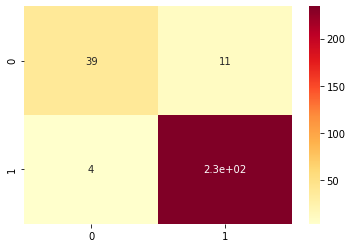

In [11]:
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predictions_tree = gridSearch_tree.predict(testData)
accuracy_tree = accuracy_score(testTarget, predictions_tree)
confusion_mat_tree = confusion_matrix(testTarget, predictions_tree)
sn.heatmap(confusion_mat_tree, annot=True, cmap = "YlOrRd")
print("Accuracy: ", accuracy_tree)

In [12]:
gridSearch_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 5.0,
 'min_samples_split': 1.0,
 'splitter': 'best'}

* ###  Random forest

In [13]:
import sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier

class_random_forest = RandomForestClassifier()
rng = np.random.default_rng()
paramGrid_random_forest = {
    'n_estimators': [75, 100, 125],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 8, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}
crossValidation_random_forest = sklearn.model_selection.StratifiedKFold()
gridSearch_random_forest = sklearn.model_selection.GridSearchCV(class_random_forest, paramGrid_random_forest, cv=crossValidation_random_forest, n_jobs=5)
gridSearch_random_forest.fit(trainingData, trainingTarget) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [75, 100, 125]})

Accuracy:  0.9756944444444444


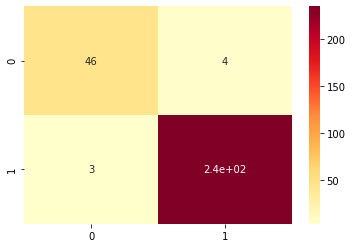

In [14]:
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predictions_random_forest = gridSearch_random_forest.predict(testData)
accuracy_random_forest = accuracy_score(testTarget, predictions_random_forest)
confusion_mat_random_forest = confusion_matrix(testTarget, predictions_random_forest)
sn.heatmap(confusion_mat_random_forest, annot=True, cmap = "YlOrRd")
print("Accuracy: ", accuracy_random_forest)

In [15]:
gridSearch_random_forest.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 125}